### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

#### CITIBIKE TRIPS SURPLUS AND DEFICIT BY ZIPCODE

In [18]:
zip_start_count = geo_df.groupby(['zip_start'],as_index=False)[['started_at']].count()
zip_start_count.columns = ['zip_start','start_count']
zip_start_count

,zip_start,start_count
0,07030,423647
1,07032,1
2,07302,296867
3,07304,38256
4,07305,2927
5,07306,76757
6,07307,22817
7,07310,75146
8,07311,7477


In [19]:
zip_end_count = geo_df.groupby(['zip_end'],as_index=False)[['started_at']].count()
zip_end_count.columns = ['zip_end','end_count']
zip_end_count

,zip_end,end_count
0,07030,426608
1,07032,1
2,07302,301832
3,07304,38236
4,07305,3282
5,07306,68424
6,07307,21475
7,07310,75887
8,07311,8150


In [20]:
zip_count = zip_start_count.merge(zip_end_count,
                             left_on = 'zip_start',
                             right_on = 'zip_end',
                             how = 'left')
zip_count.head()

,zip_start,start_count,zip_end,end_count
0,07030,423647,07030,426608
1,07032,1,07032,1
2,07302,296867,07302,301832
3,07304,38256,07304,38236
4,07305,2927,07305,3282


In [21]:
zip_count.columns = ['zipcode','start_count','endzipcode','end_count']
zip_count['surdef'] = zip_count['end_count'] - zip_count['start_count']
zip_count

,zipcode,start_count,endzipcode,end_count,surdef
0,07030,423647,07030,426608,2961
1,07032,1,07032,1,0
2,07302,296867,07302,301832,4965
3,07304,38256,07304,38236,-20
4,07305,2927,07305,3282,355
5,07306,76757,07306,68424,-8333
6,07307,22817,07307,21475,-1342
7,07310,75146,07310,75887,741
8,07311,7477,07311,8150,673


In [22]:
zip_count1 = new_map.merge(
    zip_count, 
    on= 'zipcode',
    how='left')
zip_count1

,zipcode,geometry,start_count,endzipcode,end_count,surdef
0,07032,"POLYGON ((-74.14827 40.77988, -74.14899 40.778...",1,07032,1,0
1,07306,"POLYGON ((-74.04720 40.73534, -74.04708 40.736...",76757,07306,68424,-8333
2,07311,"POLYGON ((-74.03306 40.72138, -74.03389 40.717...",7477,07311,8150,673
3,07302,"POLYGON ((-74.06419 40.72377, -74.06547 40.722...",296867,07302,301832,4965
4,07304,"POLYGON ((-74.06419 40.72377, -74.06575 40.723...",38256,07304,38236,-20
5,07310,"POLYGON ((-74.05162 40.73112, -74.04468 40.730...",75146,07310,75887,741
6,07305,"MULTIPOLYGON (((-74.04366 40.69804, -74.04170 ...",2927,07305,3282,355
7,07307,"POLYGON ((-74.07575 40.75238, -74.07386 40.751...",22817,07307,21475,-1342
8,07030,"POLYGON ((-74.03762 40.75061, -74.03873 40.748...",423647,07030,426608,2961


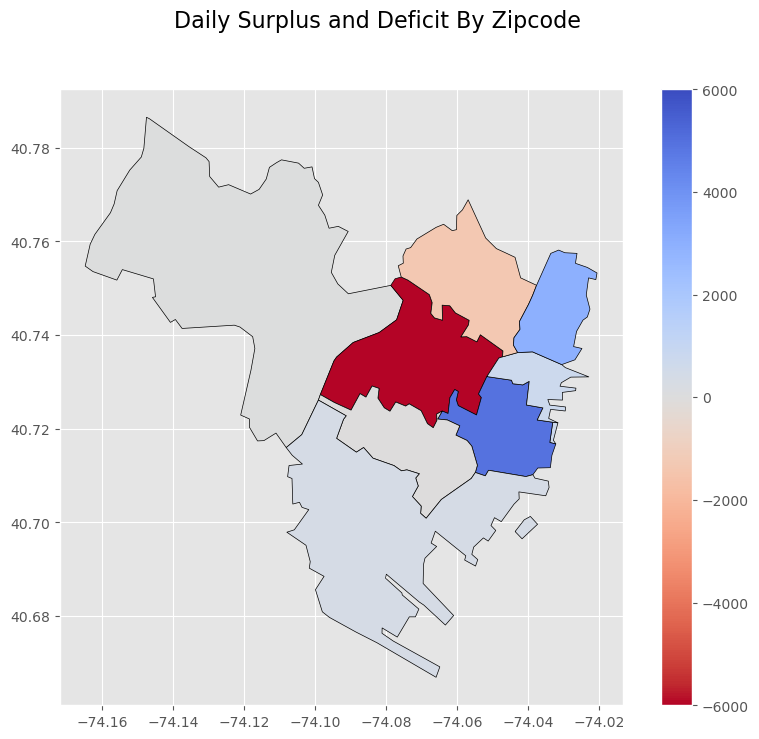

In [23]:
from matplotlib.colors import Normalize
norm1 = Normalize(vmin=-6000, vmax=6000)

fig, ax = plt.subplots(figsize=(10,8))

fig.suptitle('Daily Surplus and Deficit By Zipcode', fontsize=16)

zip_count1.plot(ax=ax, column= 'surdef', cmap='coolwarm_r', norm =norm1,edgecolor = 'black',legend=True)

plt.show()

#### CITIBIKE HOURLY TRIPS SURPLUS AND DEFICIT BY ZIPCODE

In [24]:
starts_hrly = geo_df.groupby(['starttime','zip_start'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','zip_start','start_count']
starts_hrly

,hour,zip_start,start_count
0,0,07030,5560
1,0,07302,3491
2,0,07304,160
3,0,07305,31
4,0,07306,1079
5,0,07307,289
6,0,07310,716
7,0,07311,120
8,1,07030,3957
9,1,07302,2062


In [25]:
ends_hrly = geo_df.groupby(['endtime','zip_end'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','zip_end','end_count']
ends_hrly

,hour,zip_end,end_count
0,0,07030,5589
1,0,07302,3309
2,0,07304,865
3,0,07305,98
4,0,07306,1220
5,0,07307,600
6,0,07310,871
7,0,07311,48
8,1,07030,3663
9,1,07302,1801


In [26]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','zip_start'],
                               right_on = ['hour','zip_end'],
                               how = 'outer')
supply_hrly.head(10)

,hour,zip_start,start_count,zip_end,end_count
0,0,07030,5560,07030,5589
1,0,07302,3491,07302,3309
2,0,07304,160,07304,865
3,0,07305,31,07305,98
4,0,07306,1079,07306,1220
5,0,07307,289,07307,600
6,0,07310,716,07310,871
7,0,07311,120,07311,48
8,1,07030,3957,07030,3663
9,1,07302,2062,07302,1801


In [27]:
# define hourly surplus as the difference between hourly end count and start count in a zipcode
# find daily average by dividing by 30

supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])
supply_hrly['avg_surplus'] = np.round(supply_hrly['hrly_surplus'] /365 ,2)

supply_hrly.head()


,hour,zip_start,start_count,zip_end,end_count,hrly_surplus,avg_surplus
0,0,07030,5560,07030,5589,29,0.08
1,0,07302,3491,07302,3309,-182,-0.50
2,0,07304,160,07304,865,705,1.93
3,0,07305,31,07305,98,67,0.18
4,0,07306,1079,07306,1220,141,0.39


In [28]:
# find min, max, and mean of zipcode surplus by the hour
d = supply_hrly.groupby('hour', as_index = False)[['hrly_surplus']].agg(['min','max'])
d = d['hrly_surplus'].reset_index()
d

,hour,min,max
0,0,-182,705
1,1,-294,357
2,2,-201,244
3,3,-110,146
4,4,-78,176
5,5,-614,159
6,6,-1686,482
7,7,-3436,948
8,8,-2823,1646
9,9,-1712,2161


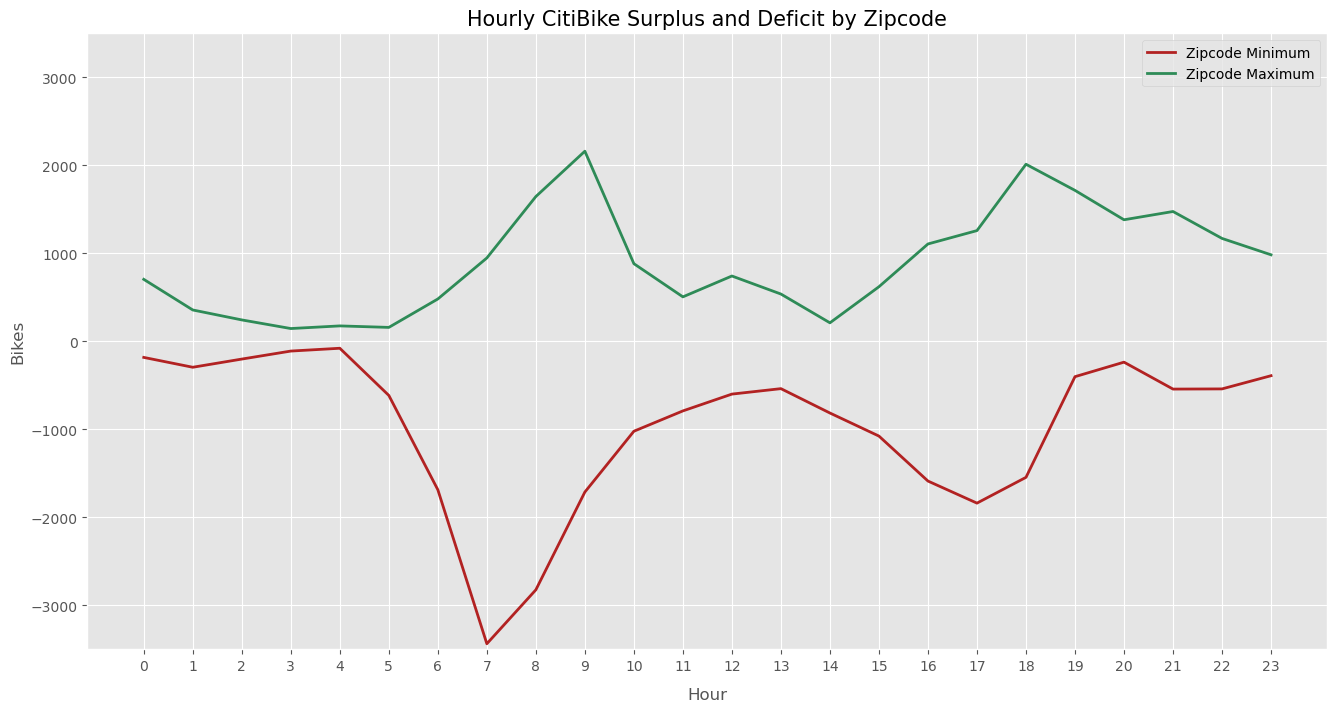

In [29]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  
#d.plot(ax=ax, x = 'hour', y = 'mean', color = 'black', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Zipcode Minimum', 'Zipcode Maximum'])

plt.title('Hourly CitiBike Surplus and Deficit by Zipcode', fontsize = 15)
ax.set_ylim(-3500,3500)
plt.show()


In [30]:
### Splitting DataFrame into Weekdays an Weekends by using Filter
# Filter out weekdays vs weekends
list1 = ['Monday','Tuesday','Wednesday','Thursday','Friday']
list2 = ['Saturday','Sunday']
weekdays = geo_df[geo_df['startweekday'].isin(list1)]
weekends = geo_df[geo_df['startweekday'].isin(list2)]

#### CITIBIKE HOURLY TRIPS SURPLUS AND DEFICIT BY ZIPCPDE FOR WEEKDAYS

In [31]:
starts_hrly = weekdays.groupby(['starttime','zip_start'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','zip_start','start_count']
starts_hrly

,hour,zip_start,start_count
0,0,07030,2170
1,0,07302,1809
2,0,07304,85
3,0,07305,18
4,0,07306,693
5,0,07307,185
6,0,07310,383
7,0,07311,52
8,1,07030,1173
9,1,07302,882


In [32]:
ends_hrly = weekdays.groupby(['endtime','zip_end'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','zip_end','end_count']
ends_hrly

,hour,zip_end,end_count
0,0,07030,2512
1,0,07302,1785
2,0,07304,509
3,0,07305,64
4,0,07306,791
5,0,07307,354
6,0,07310,412
7,0,07311,17
8,1,07030,1103
9,1,07302,762


In [33]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','zip_start'],
                               right_on = ['hour','zip_end'],
                               how = 'outer')
supply_hrly.head(10)

,hour,zip_start,start_count,zip_end,end_count
0,0,07030,2170.0,07030,2512
1,0,07302,1809.0,07302,1785
2,0,07304,85.0,07304,509
3,0,07305,18.0,07305,64
4,0,07306,693.0,07306,791
5,0,07307,185.0,07307,354
6,0,07310,383.0,07310,412
7,0,07311,52.0,07311,17
8,1,07030,1173.0,07030,1103
9,1,07302,882.0,07302,762


In [34]:
# define hourly surplus as the difference between hourly end count and start count in a zipcode
# find daily average by dividing by 30

supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])
supply_hrly['avg_surplus'] = np.round(supply_hrly['hrly_surplus'] /365 ,2)

supply_hrly.head()




,hour,zip_start,start_count,zip_end,end_count,hrly_surplus,avg_surplus
0,0,07030,2170.0,07030,2512,342.0,0.94
1,0,07302,1809.0,07302,1785,-24.0,-0.07
2,0,07304,85.0,07304,509,424.0,1.16
3,0,07305,18.0,07305,64,46.0,0.13
4,0,07306,693.0,07306,791,98.0,0.27


In [35]:
# find min, max, and mean of zipcode surplus by the hour
d = supply_hrly.groupby('hour', as_index = False)[['hrly_surplus']].agg(['min','max'])
d = d['hrly_surplus'].reset_index()
d

,hour,min,max
0,0,-35.0,424.0
1,1,-120.0,149.0
2,2,-51.0,106.0
3,3,-42.0,27.0
4,4,-130.0,166.0
5,5,-545.0,167.0
6,6,-1567.0,458.0
7,7,-3247.0,915.0
8,8,-2567.0,1888.0
9,9,-1270.0,2197.0


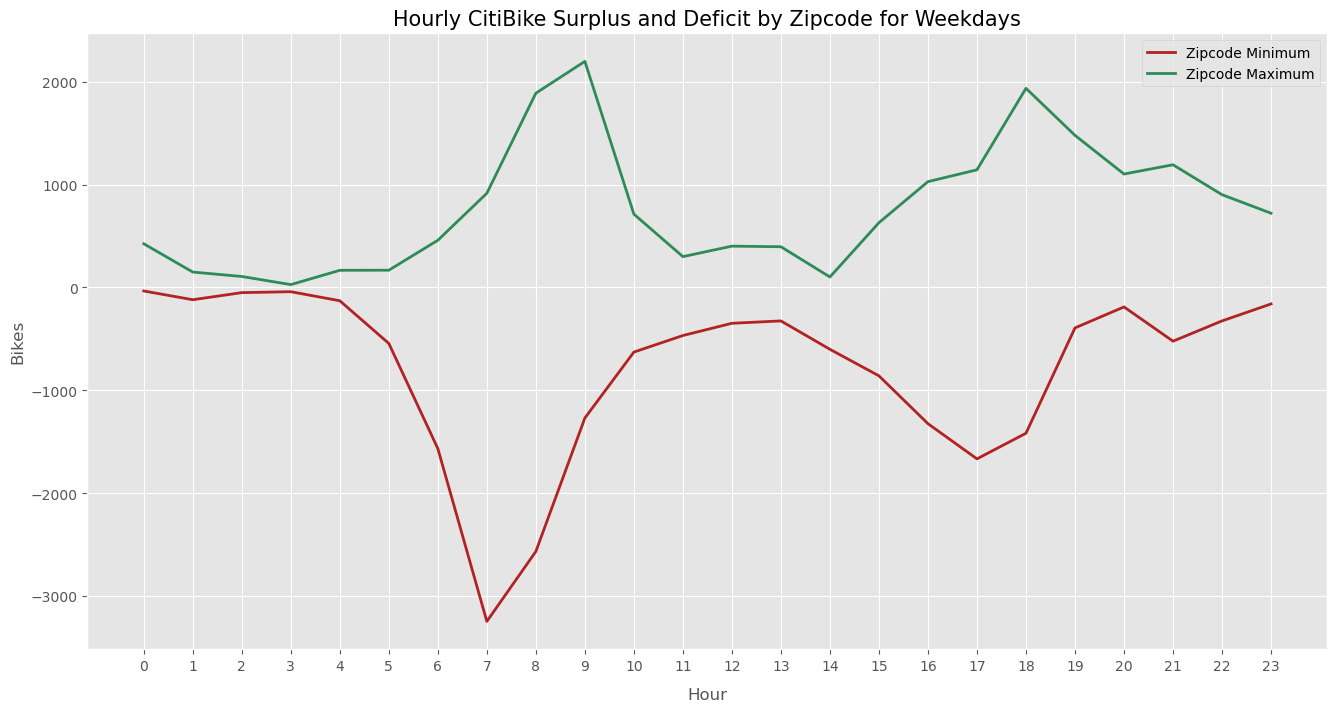

In [36]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  
#d.plot(ax=ax, x = 'hour', y = 'mean', color = 'black', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Zipcode Minimum', 'Zipcode Maximum'])

plt.title('Hourly CitiBike Surplus and Deficit by Zipcode for Weekdays', fontsize = 15)
plt.show()


#### CITIBIKE HOURLY TRIPS SURPLUS AND DEFICIT BY ZIPCPDE FOR WEEKENDS

In [37]:
starts_hrly = weekends.groupby(['starttime','zip_start'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','zip_start','start_count']
starts_hrly

,hour,zip_start,start_count
0,0,07030,3390
1,0,07302,1682
2,0,07304,75
3,0,07305,13
4,0,07306,386
5,0,07307,104
6,0,07310,333
7,0,07311,68
8,1,07030,2784
9,1,07302,1180


In [38]:
ends_hrly = weekends.groupby(['endtime','zip_end'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','zip_end','end_count']
ends_hrly

,hour,zip_end,end_count
0,0,07030,3077
1,0,07302,1524
2,0,07304,356
3,0,07305,34
4,0,07306,429
5,0,07307,246
6,0,07310,459
7,0,07311,31
8,1,07030,2560
9,1,07302,1039


In [39]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','zip_start'],
                               right_on = ['hour','zip_end'],
                               how = 'outer')
supply_hrly.head(10)

,hour,zip_start,start_count,zip_end,end_count
0,0,07030,3390,07030,3077
1,0,07302,1682,07302,1524
2,0,07304,75,07304,356
3,0,07305,13,07305,34
4,0,07306,386,07306,429
5,0,07307,104,07307,246
6,0,07310,333,07310,459
7,0,07311,68,07311,31
8,1,07030,2784,07030,2560
9,1,07302,1180,07302,1039


In [40]:
supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])
supply_hrly['avg_surplus'] = np.round(supply_hrly['hrly_surplus'] /365 ,2)

supply_hrly.head()



,hour,zip_start,start_count,zip_end,end_count,hrly_surplus,avg_surplus
0,0,07030,3390,07030,3077,-313,-0.86
1,0,07302,1682,07302,1524,-158,-0.43
2,0,07304,75,07304,356,281,0.77
3,0,07305,13,07305,34,21,0.06
4,0,07306,386,07306,429,43,0.12


In [41]:
# find min, max, and mean of zipcode surplus by the hour
d = supply_hrly.groupby('hour', as_index = False)[['hrly_surplus']].agg(['min','max'])
d = d['hrly_surplus'].reset_index()
d

,hour,min,max
0,0,-313,281
1,1,-224,208
2,2,-150,180
3,3,-68,119
4,4,-22,52
5,5,-69,39
6,6,-119,24
7,7,-189,78
8,8,-256,208
9,9,-442,230


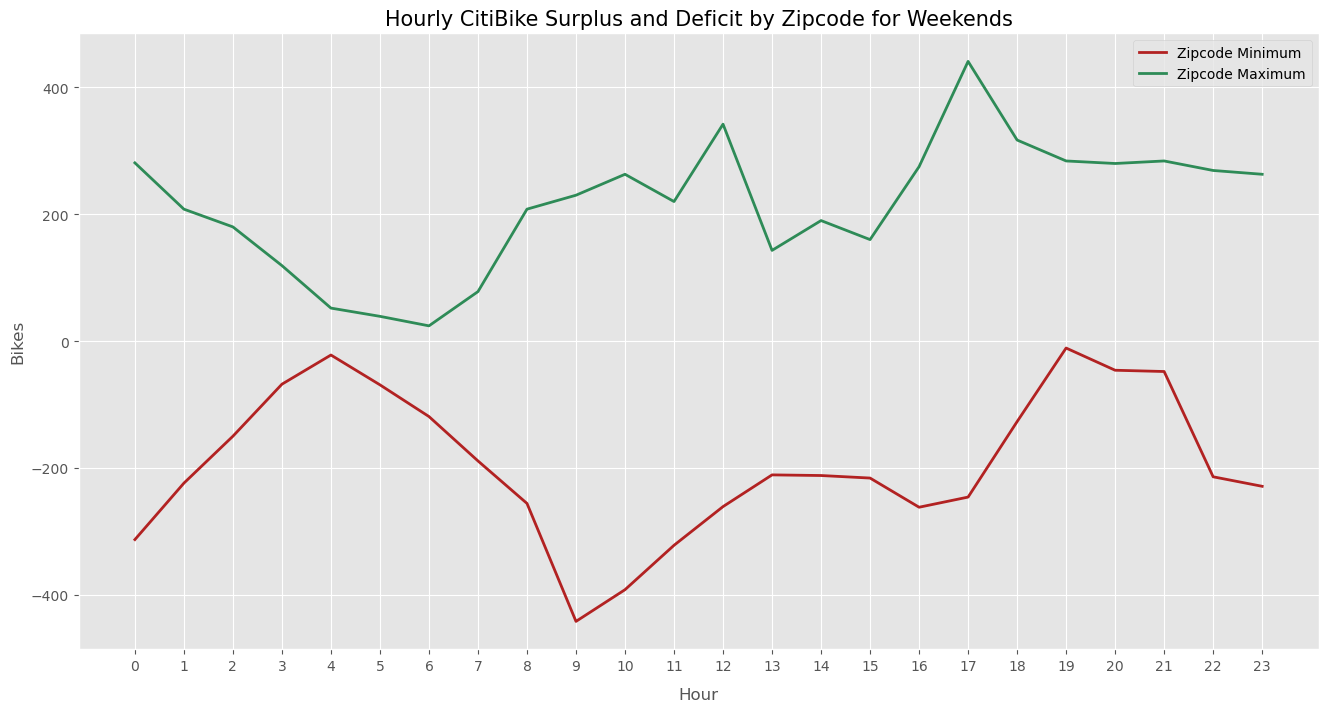

In [42]:
# line graph of hourly zipcode surplus and deficit

fig, ax = plt.subplots(figsize=(16,8)) # w x h

x = np.arange(24)
  
#d.plot(ax=ax, x = 'hour', y = 'mean', color = 'black', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'min', color = 'firebrick', linewidth = 2)
d.plot(ax=ax, x = 'hour', y = 'max', color = 'seagreen', linewidth = 2)

plt.xticks(x)
plt.xlabel("Hour", labelpad = 10)

plt.ylabel("Bikes")
plt.legend(['Zipcode Minimum', 'Zipcode Maximum'])

plt.title('Hourly CitiBike Surplus and Deficit by Zipcode for Weekends', fontsize = 15)
plt.show()
